In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
# data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
# data = yf.download(tickers = '^IXIC', start = '2020-07-05',end = '2024-07-05')
data = yf.download(tickers = '^GSPC', start = '2020-07-05',end = '2024-07-05')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-06,3155.290039,3182.590088,3155.290039,3179.719971,3179.719971,4759160000
2020-07-07,3166.439941,3184.149902,3142.929932,3145.320068,3145.320068,4571330000
2020-07-08,3153.070068,3171.800049,3136.530029,3169.939941,3169.939941,4937310000
2020-07-09,3176.169922,3179.780029,3115.699951,3152.050049,3152.050049,4843650000
2020-07-10,3152.469971,3186.820068,3136.219971,3185.040039,3185.040039,4524190000
2020-07-13,3205.080078,3235.320068,3149.429932,3155.219971,3155.219971,4902440000
2020-07-14,3141.110107,3200.949951,3127.659912,3197.520020,3197.520020,4507140000
2020-07-15,3225.979980,3238.280029,3200.760010,3226.560059,3226.560059,4686830000
2020-07-16,3208.360107,3220.389893,3198.590088,3215.570068,3215.570068,3972860000


In [2]:
len(data)

1006

In [8]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)
# Calculate MACD
# macd = ta.macd(data.Close, fast=12, slow=26, signal=9)

# print(macd)

data['Target'] = data['Adj Close'] - data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

/var/folders/1v/lpjl6vj906s43r87d8bhvdb80000gn/T/ipykernel_33247/2718083632.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [9]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,3878.300049,3894.560059,3874.929932,3886.830078,61.974841,3805.530007,3619.720635,3499.878071,23.000000,1,3915.590088
1,3892.590088,3915.770020,3892.590088,3915.590088,64.380564,3816.011919,3625.579436,3505.384191,0.739990,1,3911.229980
2,3910.489990,3918.350098,3902.639893,3911.229980,63.725686,3825.080306,3631.235882,3510.759632,-10.900146,0,3909.879883
3,3920.780029,3931.500000,3884.939941,3909.879883,63.511354,3833.156456,3636.753585,3516.045993,-0.020020,0,3916.379883
4,3916.399902,3925.989990,3890.389893,3916.379883,64.133615,3841.082497,3642.290740,3521.348428,23.180176,1,3934.830078
5,3911.649902,3937.229980,3905.780029,3934.830078,65.902069,3850.010838,3648.083598,3526.825006,-7.020020,0,3932.590088
6,3939.610107,3950.429932,3923.850098,3932.590088,65.482081,3857.875528,3653.717390,3532.199378,12.830078,1,3931.330078
7,3918.500000,3933.610107,3900.429932,3931.330078,65.231536,3864.871200,3659.214671,3537.485878,-1.890137,0,3913.969971
8,3915.860107,3921.979980,3885.030029,3913.969971,61.744136,3869.547273,3664.259330,3542.472422,-14.449951,0,3906.709961
9,3921.159912,3930.409912,3903.070068,3906.709961,60.299671,3873.086577,3669.060333,3547.296760,-9.050049,0,3876.500000


In [35]:
# Target column Categories
# y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
# yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
# print(yi)
# print(len(yi))

AttributeError: 'DataFrame' object has no attribute 'Close'

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.18080738 0.14943871 0.19363649 ... 0.56458694 1.         0.17273561]
 [0.18802596 0.16051267 0.20255693 ... 0.48799207 1.         0.17051105]
 [0.19706805 0.16185976 0.20763326 ... 0.44793931 0.         0.16982222]
 ...
 [0.99418562 1.         0.98979679 ... 0.4992431  1.         0.96840281]
 [0.98539611 0.97697993 0.98747813 ... 0.64775366 1.         0.98570898]
 [0.98072843 0.99271644 0.99348922 ... 0.58722845 1.         1.        ]]


In [11]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

856
[[[0.18080738 0.14943871 0.19363649 ... 0.05912128 0.         0.        ]
  [0.18802596 0.16051267 0.20255693 ... 0.06520122 0.00373795 0.00351861]
  [0.19706805 0.16185976 0.20763326 ... 0.07046125 0.0073468  0.00695372]
  ...
  [0.21680925 0.19606851 0.22435268 ... 0.11300987 0.07358562 0.07650857]
  [0.21879444 0.18862842 0.21178543 ... 0.11395037 0.07586478 0.07901272]
  [0.19840664 0.16800502 0.19960701 ... 0.11467093 0.078069   0.08146374]]

 [[0.18802596 0.16051267 0.20255693 ... 0.06520122 0.00373795 0.00351861]
  [0.19706805 0.16185976 0.20763326 ... 0.07046125 0.0073468  0.00695372]
  [0.20226604 0.16872548 0.19869271 ... 0.07514574 0.01086713 0.0103319 ]
  ...
  [0.21879444 0.18862842 0.21178543 ... 0.11395037 0.07586478 0.07901272]
  [0.19840664 0.16800502 0.19960701 ... 0.11467093 0.078069   0.08146374]
  [0.20009388 0.18115698 0.21345222 ... 0.11684146 0.08057688 0.08411496]]

 [[0.19706805 0.16185976 0.20763326 ... 0.07046125 0.0073468  0.00695372]
  [0.20226604 0.16

In [7]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [12]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

660
(660, 30, 8)
(166, 30, 8)
(660, 1)
(166, 1)
[[0.17014882]
 [0.15924054]
 [0.16963862]
 [0.20281227]
 [0.20105208]
 [0.19465407]
 [0.20197035]
 [0.22593997]
 [0.25555227]
 [0.25352676]
 [0.25659311]
 [0.26537885]
 [0.28151663]
 [0.28110358]
 [0.28804219]
 [0.27940455]
 [0.30275149]
 [0.31043025]
 [0.29909833]
 [0.28464937]
 [0.30428211]
 [0.2846698 ]
 [0.30772601]
 [0.31152715]
 [0.31106801]
 [0.30926186]
 [0.32369563]
 [0.30823621]
 [0.31409861]
 [0.29981282]
 [0.30130757]
 [0.31867004]
 [0.33447623]
 [0.31194044]
 [0.29340459]
 [0.24796556]
 [0.27320036]
 [0.30450159]
 [0.29911378]
 [0.28102187]
 [0.27482291]
 [0.29698626]
 [0.29532285]
 [0.31633824]
 [0.31178723]
 [0.31579764]
 [0.31829237]
 [0.31994032]
 [0.31888429]
 [0.32198638]
 [0.31419552]
 [0.33309359]
 [0.33137414]
 [0.33175156]
 [0.32781789]
 [0.33783343]
 [0.34204762]
 [0.34598129]
 [0.34161389]
 [0.32993544]
 [0.32899649]
 [0.30072611]
 [0.33049149]
 [0.34153741]
 [0.33919041]
 [0.35176721]
 [0.35901722]
 [0.3640732 ]


In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

2024-07-08 22:44:08.216800: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0216 - val_loss: 0.0013
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0016 - val_loss: 9.5169e-04
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0015 - val_loss: 9.3870e-04
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0016 - val_loss: 9.3837e-04
Epoch 10/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 11/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - val_loss: 8.8523e-04
Epoch 12/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/

In [14]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
[0.32992807] [0.39862949]
[0.36748436] [0.40252754]
[0.38911712] [0.40885405]
[0.3944881] [0.41109891]
[0.4025694] [0.39302245]
[0.40821835] [0.42766045]
[0.39451823] [0.42577757]
[0.42414293] [0.46871166]
[0.42732927] [0.47237479]
[0.46567985] [0.47510967]


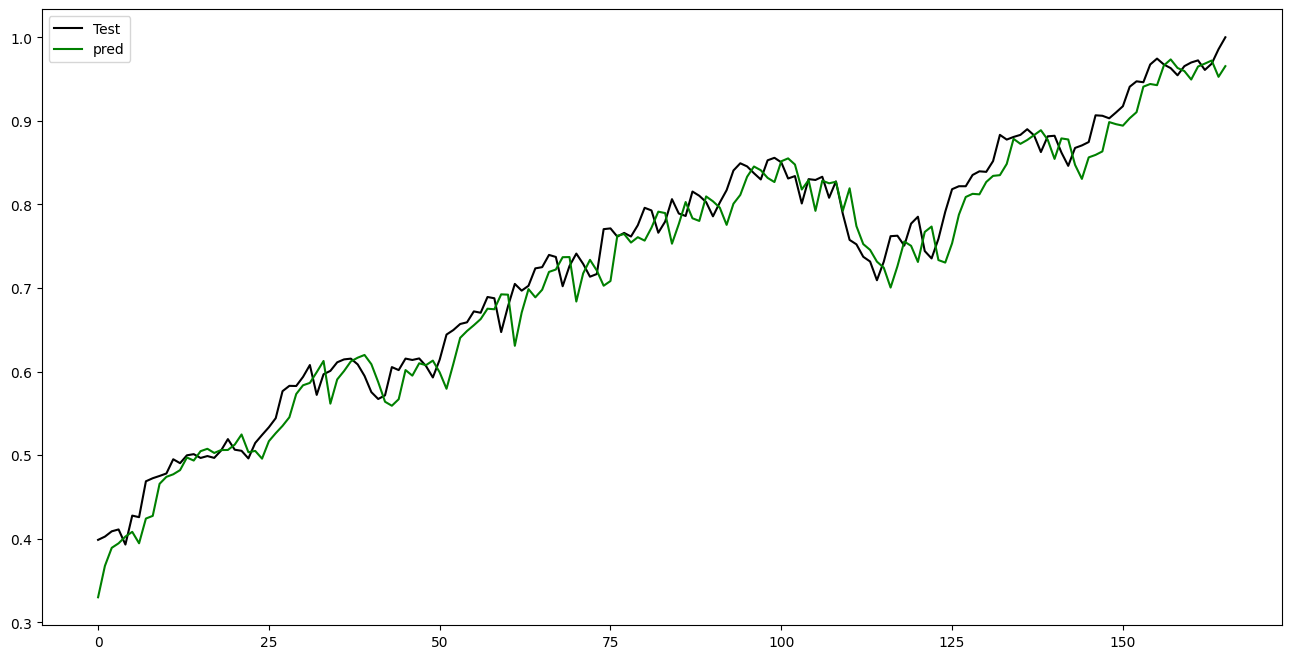

In [15]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()